In [1]:
# 绘图案例 an example of matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
import seaborn as sns
import missingno as msno


In [2]:
train = pd.read_csv('./used_car_train_20200313.zip', sep=' ')
test = pd.read_csv('./used_car_testA_20200313.zip', sep=' ')

##  数据缺失与异常

In [3]:
train.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

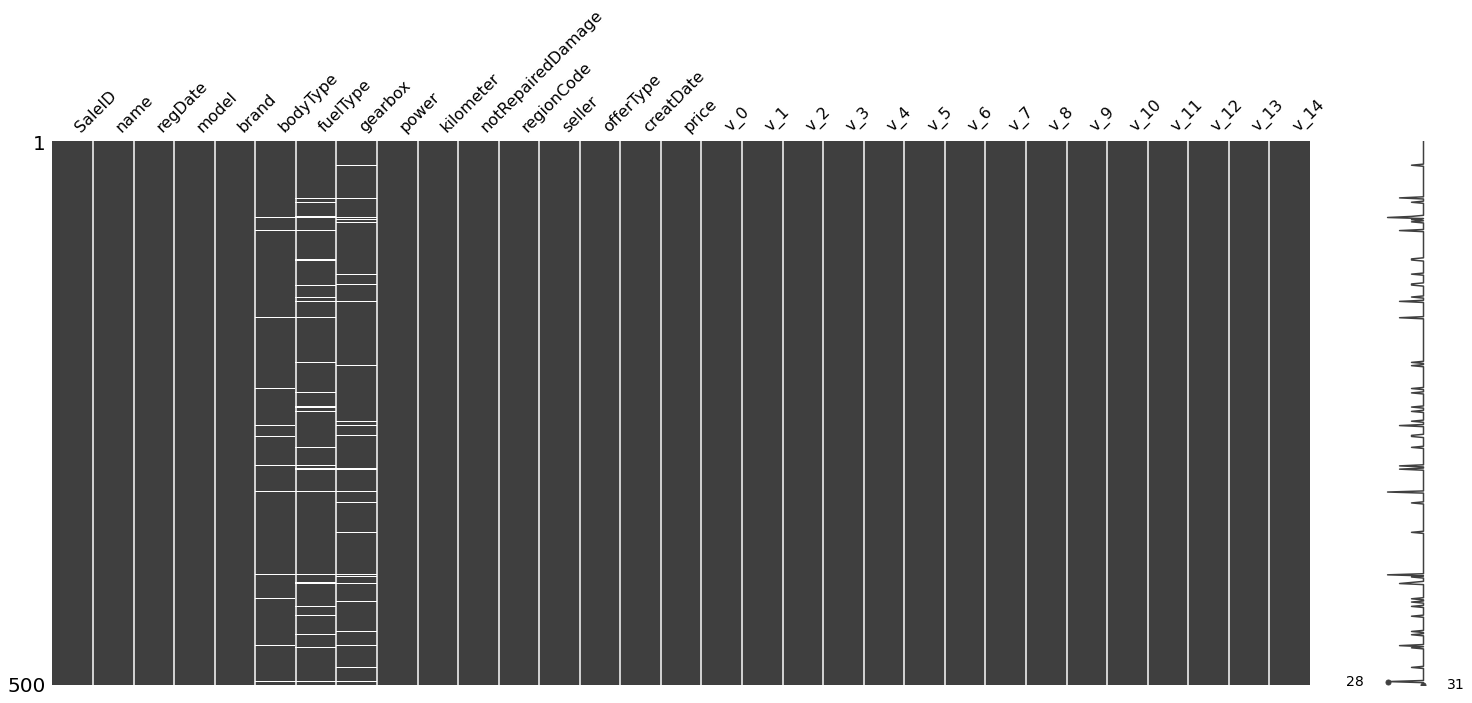

In [6]:
# 可视化看下缺省值
msno.matrix(train.sample(500))

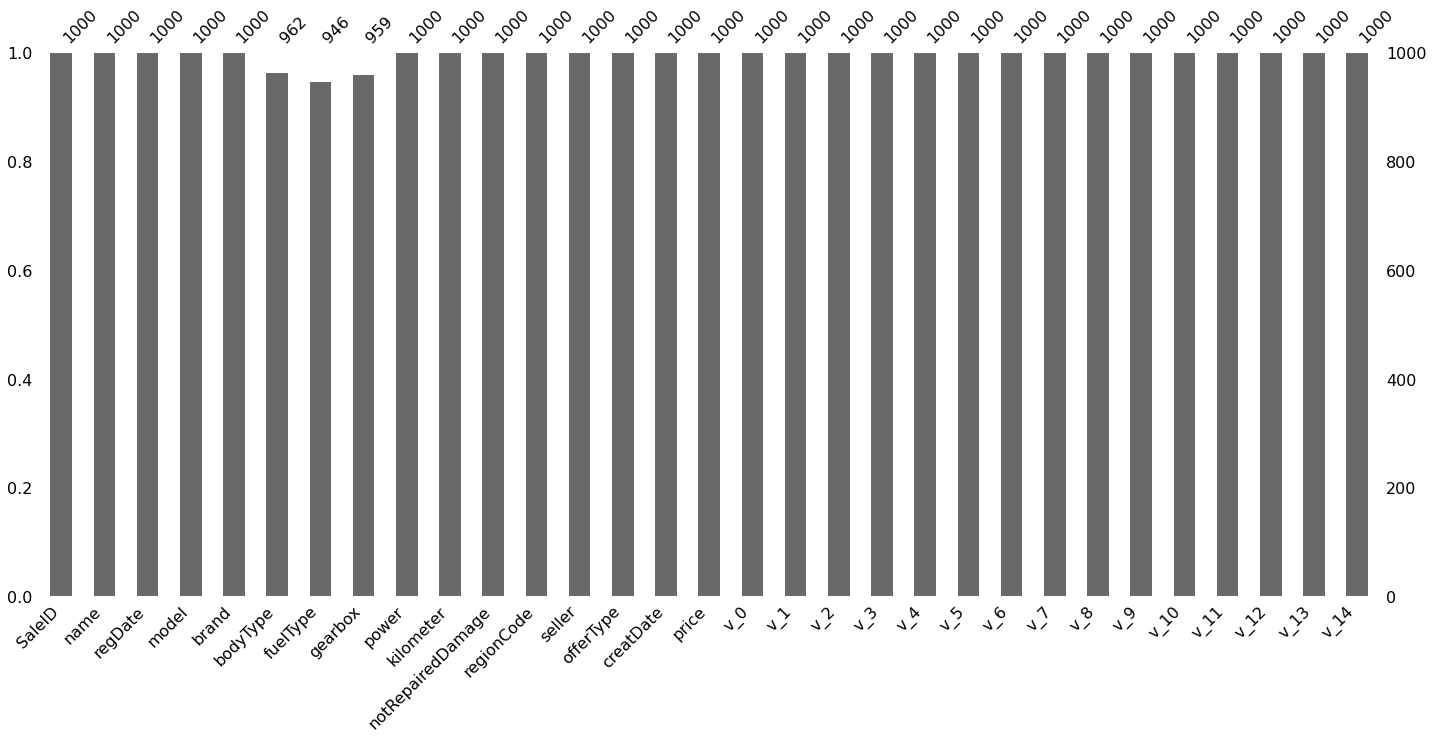

In [7]:
msno.bar(train.sample(1000))

In [8]:
train['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [9]:
train['notRepairedDamage'].replace('-', np.nan, inplace=True)

类别特征箱形图可视化

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


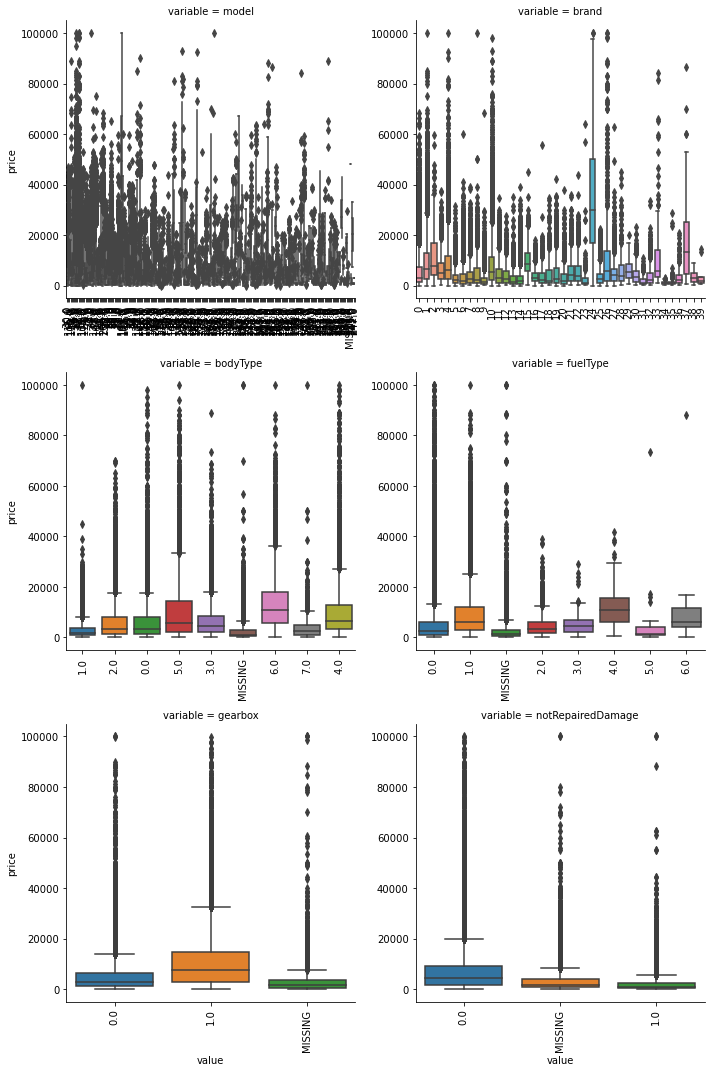

In [10]:
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage'] 
for c in categorical_features: 
    train[c] = train[c].astype('category') 
    if train[c].isnull().any(): 
        train[c] = train[c].cat.add_categories(['MISSING']) 
        train[c] = train[c].fillna('MISSING') 
    
def boxplot(x, y, **kwargs): 
    sns.boxplot(x=x, y=y) 
    x=plt.xticks(rotation=90) 

f = pd.melt(train, id_vars=['price'], value_vars=categorical_features) 
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5) 
g = g.map(boxplot, "value", "price")


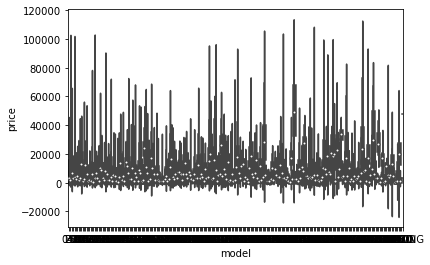

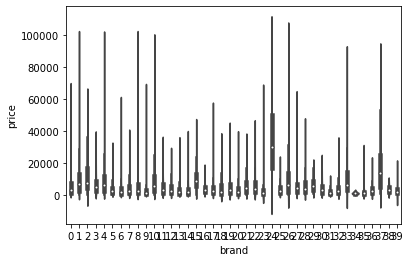

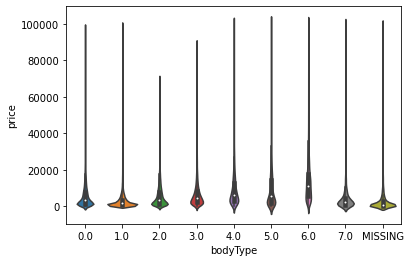

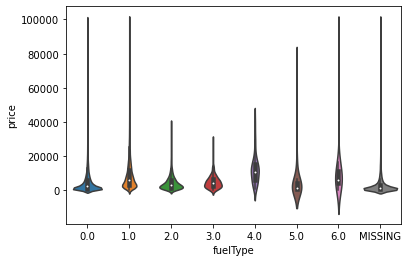

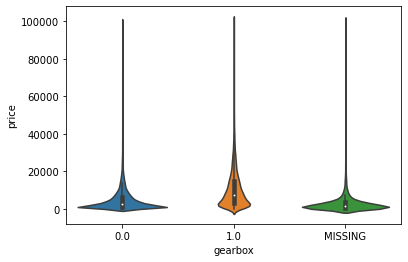

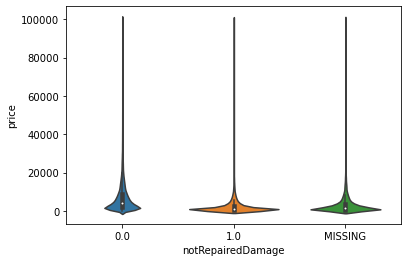

In [11]:
## 3) 类别特征的小提琴图可视化 
catg_list = categorical_features 
target = 'price' 
for catg in catg_list : 
    sns.violinplot(x=catg, y=target, data=train) 
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


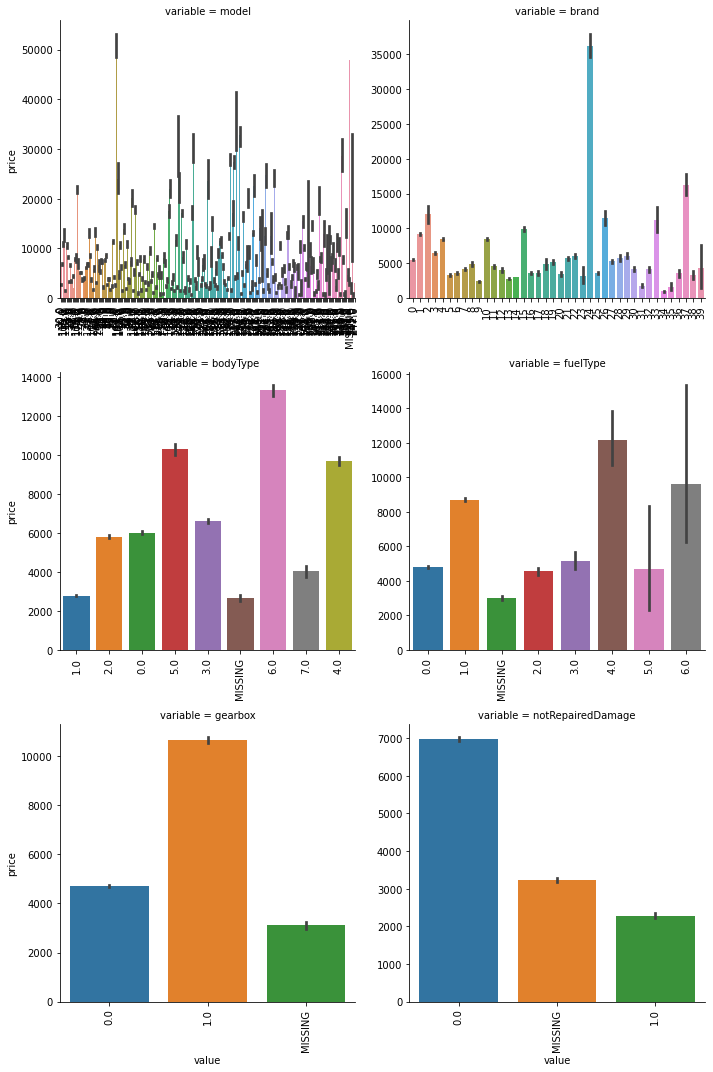

In [13]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs): 
    sns.barplot(x=x, y=y) 
    x=plt.xticks(rotation=90) 
    
f = pd.melt(train, id_vars=['price'], value_vars=categorical_features) 
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5) 
g = g.map(bar_plot, "value", "price")


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


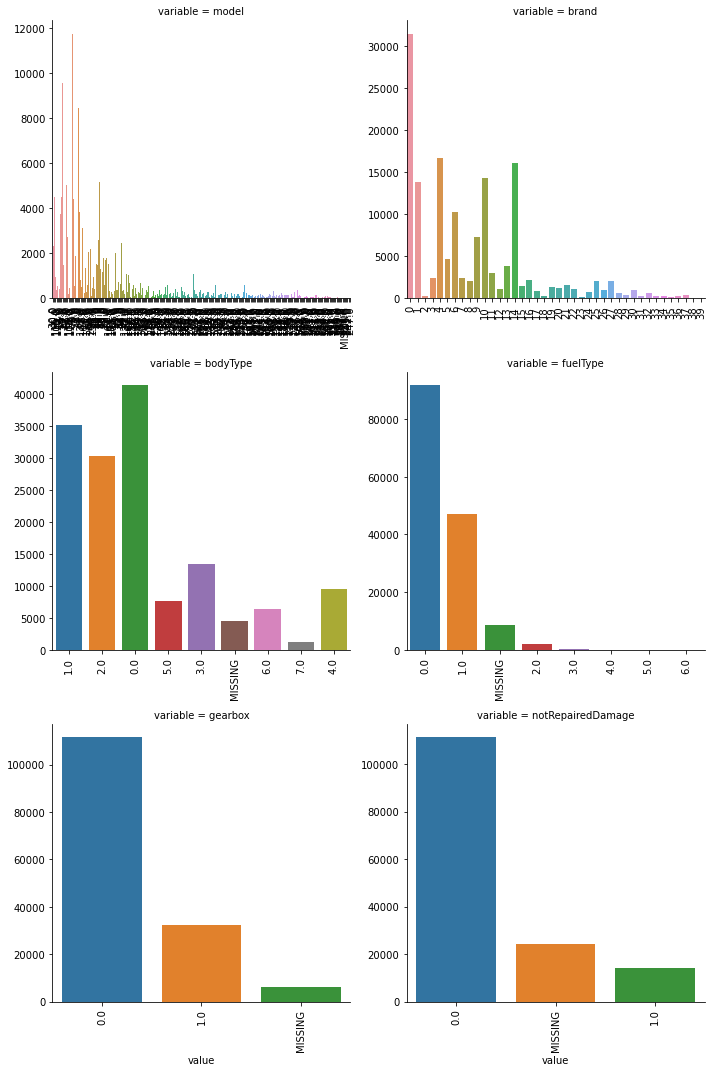

In [15]:
##  5) 类别特征的每个类别频数可视化(count_plot) 
def count_plot(x, **kwargs): 
    sns.countplot(x=x) 
    x=plt.xticks(rotation=90) 
    
f = pd.melt(train, value_vars=categorical_features) 
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5) 
g = g.map(count_plot, "value")


多变量分析 https://www.jianshu.com/p/6e18d21a4cad

In [17]:
Train_data=train.copy()
Y_train = Train_data['price']

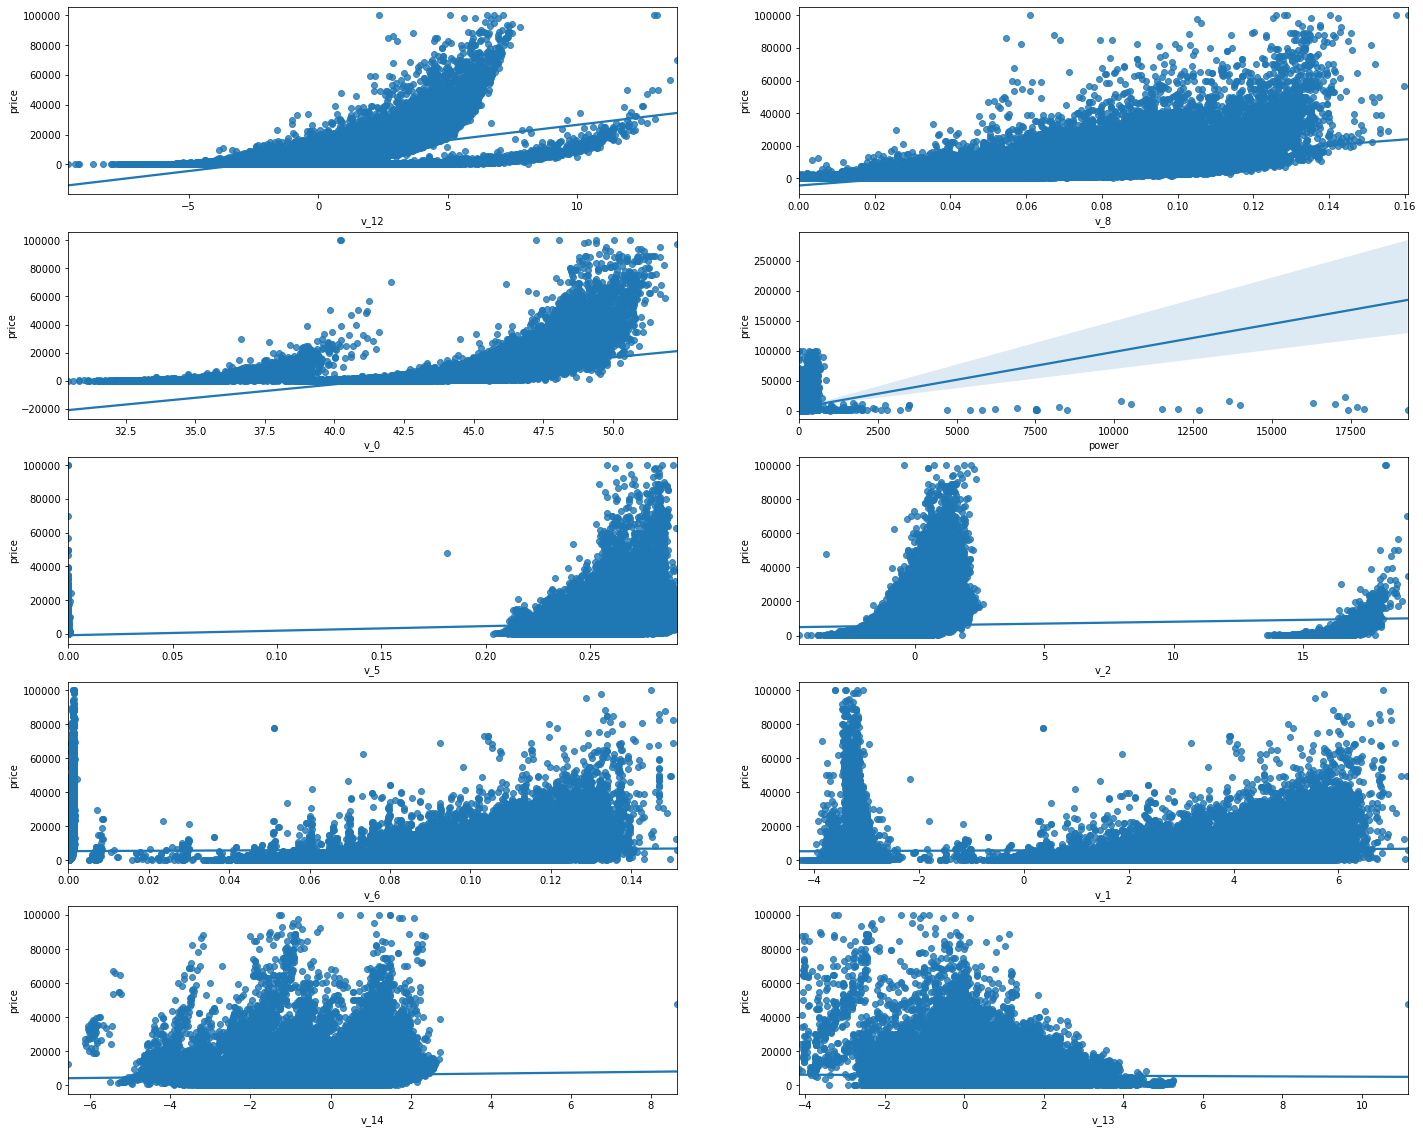

In [19]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

## 用pandas_profiling生成数据报告
-   用pandas_profiling生成一个较为全面的可视化和数据报告(较为简单、方便) 最终打开html文件即可

In [ ]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")